In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic-dataset/Titanic-Dataset.csv


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


ImportError: Traceback (most recent call last):
  File "C:\Users\Hamxa\AppData\Roaming\Python\Python313\site-packages\tensorflow\python\pywrap_tensorflow.py", line 73, in <module>
    from tensorflow.python._pywrap_tensorflow_internal import *
ImportError: DLL load failed while importing _pywrap_tensorflow_internal: A dynamic link library (DLL) initialization routine failed.


Failed to load the native TensorFlow runtime.
See https://www.tensorflow.org/install/errors for some common causes and solutions.
If you need help, create an issue at https://github.com/tensorflow/tensorflow/issues and include the entire stack trace above this error message.

In [10]:
df = pd.read_csv("/kaggle/input/titanic-dataset/Titanic-Dataset.csv")

df = df.drop(["Name", "Ticket", "Cabin"], axis=1)
df["Age"] = df["Age"].fillna(df["Age"].mean())
df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode()[0])
df = pd.get_dummies(df, columns=["Sex", "Embarked"], drop_first=True)

X = df.drop("Survived", axis=1).values
y = df["Survived"].values

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
def build_model(regularization=None, use_dropout=False, use_bn=False):
    model = tf.keras.Sequential()
    
    # First hidden layer
    model.add(tf.keras.layers.Dense(64, activation='relu',
                                    kernel_regularizer=regularization,
                                    input_shape=(X_train.shape[1],)))
    if use_bn:
        model.add(tf.keras.layers.BatchNormalization())
    if use_dropout:
        model.add(tf.keras.layers.Dropout(0.5))
    
    # Second hidden layer
    model.add(tf.keras.layers.Dense(32, activation='relu',
                                    kernel_regularizer=regularization))
    if use_bn:
        model.add(tf.keras.layers.BatchNormalization())
    if use_dropout:
        model.add(tf.keras.layers.Dropout(0.5))
    
    # Output layer
    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
    
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

In [12]:
EPOCHS = 100
BATCH_SIZE = 32
callbacks = [tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)]


In [13]:
def plot_history(history, title):
    """Helper function to plot accuracy & loss"""
    plt.figure(figsize=(14,6))

    # Accuracy
    plt.subplot(1,2,1)
    plt.plot(history.history['accuracy'], label="Train Acc")
    plt.plot(history.history['val_accuracy'], label="Val Acc")
    plt.title(f"{title} - Accuracy")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()

    # Loss
    plt.subplot(1,2,2)
    plt.plot(history.history['loss'], label="Train Loss")
    plt.plot(history.history['val_loss'], label="Val Loss")
    plt.title(f"{title} - Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()

    plt.show()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-09-17 05:55:10.601210: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


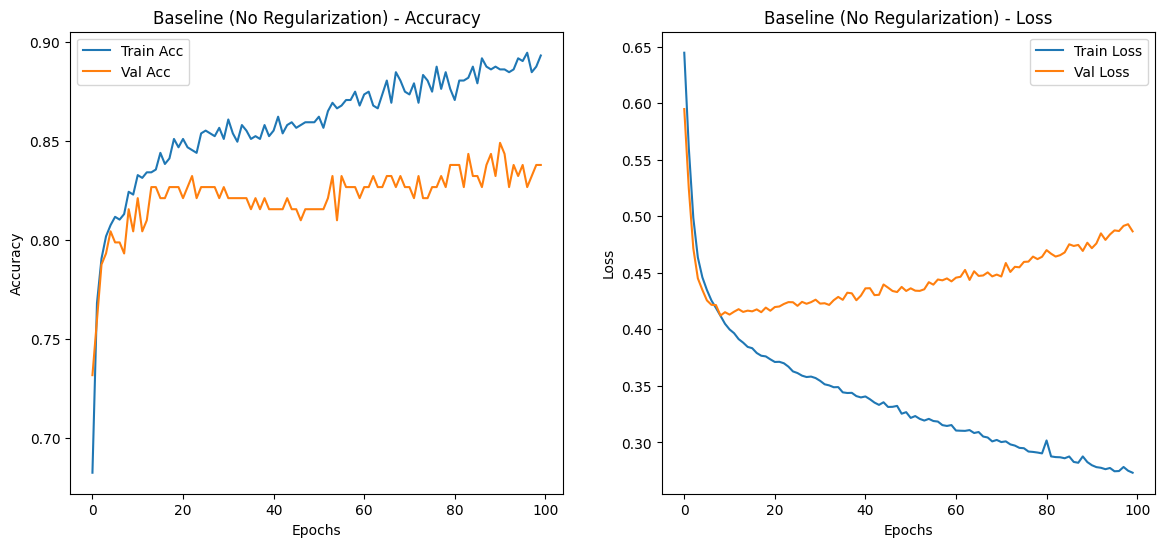

In [14]:
baseline_model = build_model()
history_baseline = baseline_model.fit(X_train, y_train,
                                      validation_data=(X_val, y_val),
                                      epochs=EPOCHS, batch_size=BATCH_SIZE,
                                      verbose=0)
plot_history(history_baseline, "Baseline (No Regularization)")

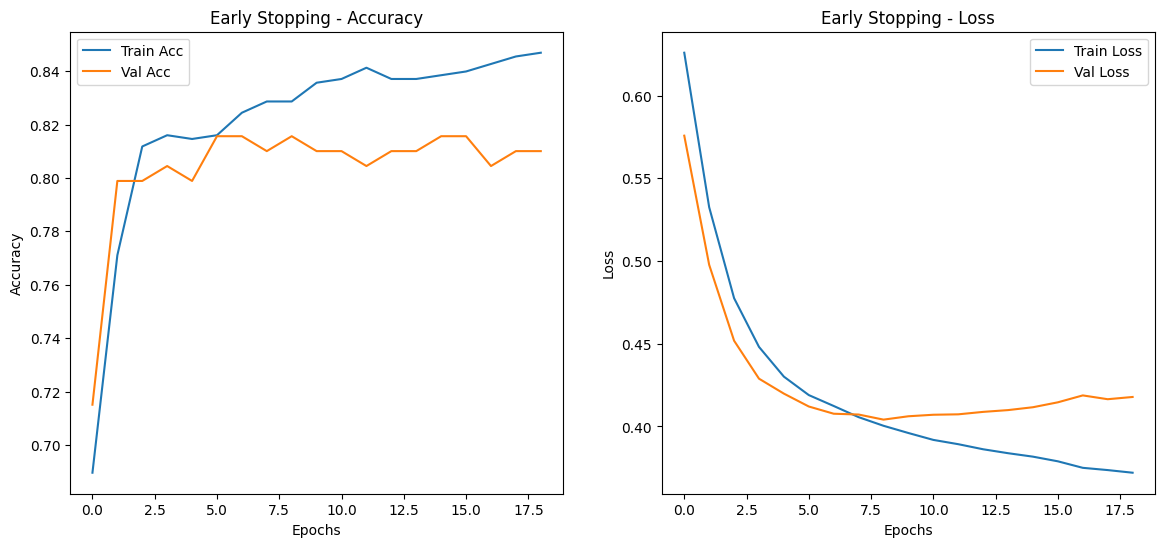

In [15]:
early_model = build_model()
history_early = early_model.fit(X_train, y_train,
                                validation_data=(X_val, y_val),
                                epochs=EPOCHS, batch_size=BATCH_SIZE,
                                callbacks=callbacks, verbose=0)
plot_history(history_early, "Early Stopping")

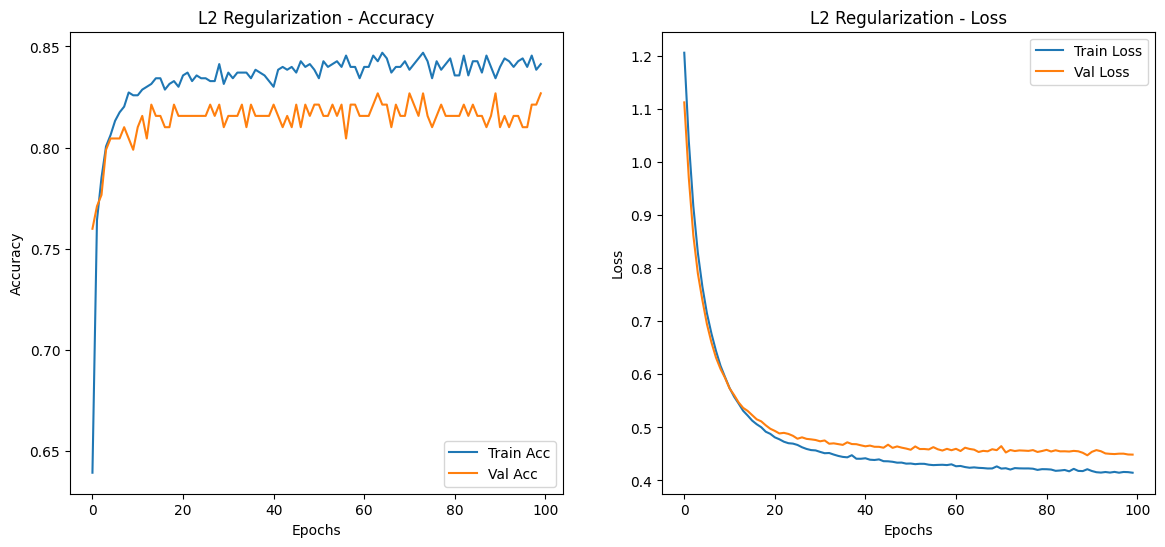

In [16]:
l2_model = build_model(regularization=tf.keras.regularizers.l2(0.01))
history_l2 = l2_model.fit(X_train, y_train,
                          validation_data=(X_val, y_val),
                          epochs=EPOCHS, batch_size=BATCH_SIZE,
                          verbose=0)
plot_history(history_l2, "L2 Regularization")

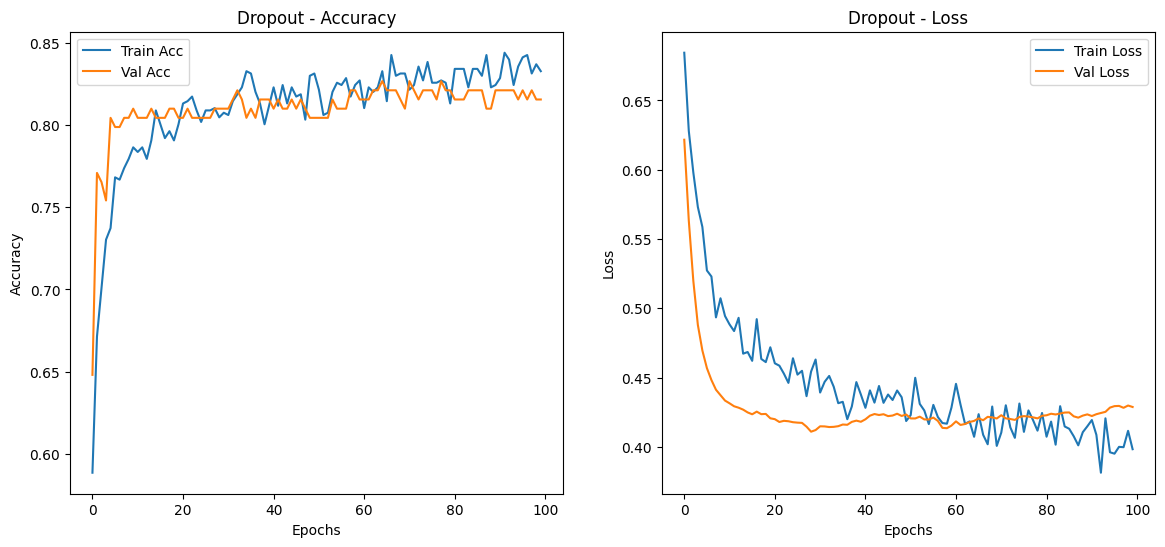

In [17]:
dropout_model = build_model(use_dropout=True)
history_dropout = dropout_model.fit(X_train, y_train,
                                    validation_data=(X_val, y_val),
                                    epochs=EPOCHS, batch_size=BATCH_SIZE,
                                    verbose=0)
plot_history(history_dropout, "Dropout")

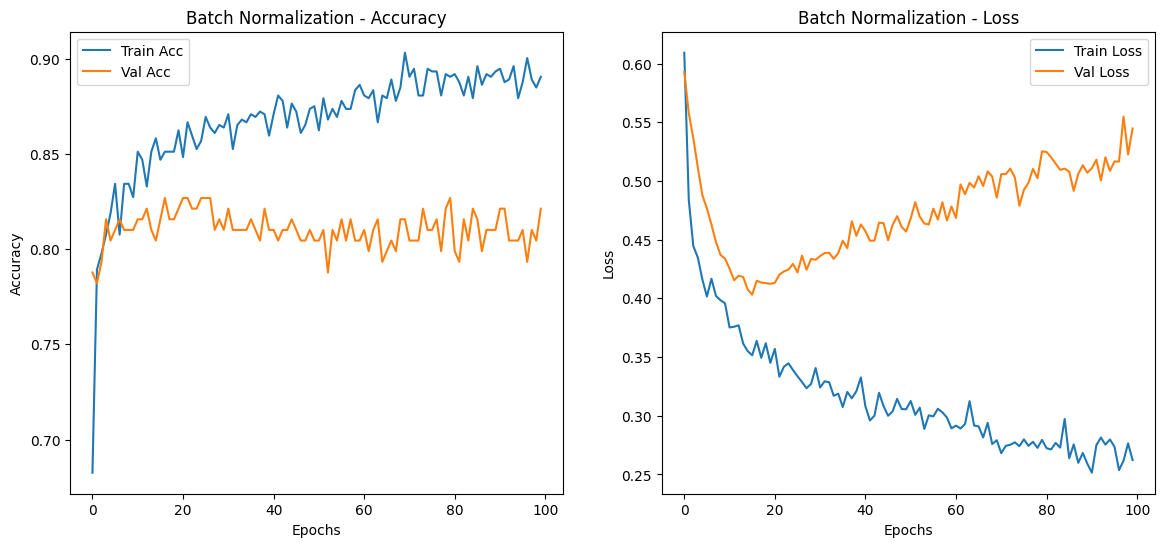

In [18]:
bn_model = build_model(use_bn=True)
history_bn = bn_model.fit(X_train, y_train,
                          validation_data=(X_val, y_val),
                          epochs=EPOCHS, batch_size=BATCH_SIZE,
                          verbose=0)
plot_history(history_bn, "Batch Normalization")